In [77]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn


def select(conn, query, bindVal):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    #print(bindVal)
    cur.execute(query, (bindVal, bindVal, bindVal, bindVal, bindVal, bindVal, bindVal, bindVal)) # executing queries with bindVal parameters for EPL seasons
                
    rows = cur.fetchall() # rows object stores queried data
    
    rowsAsList = [] # rowsAsList object will store rows from tuple, rows, to a list
    
    for row in rows: # for-loop appends rows from tuple, rows, to list, rowsAsList
        print(row)
        rowsAsList.append(row)
    
    #print(rowsAsList)
    df = pd.DataFrame(rowsAsList, columns=['Team API ID', 'Build-Up Play Speed', 'Build-Up Play Passing', 'Chance Creation Passing', 'Chance Creation Crossing', 'Chance Creation Shooting', 'Defence Pressure', 'Defence Aggression', 'Avg Overall Player Rating', 'Points'])
    #print(df)
    return df
        
    

print("Creating connection to EuropeanSoccerDatabase.sqlite.")
database = "/Users/preranadevadhar/Downloads/EuropeanSoccerDatabase.sqlite" # create database variable storing local directory path for database
conn = create_connection(database) # create a database connection
with conn: 
    # query data for season 2010-11, 2011-12, 2012-13, 2013-14, passing in seasons as bind values for each query; store queried data in dataframes df1, df2, df3, df4
    print("Querying EPL 2010-11 Data: ")
    df1 = select(conn, "select tr.team_api_id, epla.buildUpPlaySpeed, epla.buildUpPlayPassing, epla.chanceCreationPassing, epla.chanceCreationCrossing, epla.chanceCreationShooting, epla.defencePressure, epla.defenceAggression, prpt.avg_team_rating, tr.tp from (select team_attributes.team_api_id, team_attributes.buildUpPlaySpeed, team_attributes.buildUpPlayPassing, team_attributes.chanceCreationPassing, team_attributes.chanceCreationCrossing, team_attributes.chanceCreationShooting, team_attributes.defencePressure, team_attributes.defenceAggression from team_attributes where date like ? and team_attributes.team_api_id in (select distinct home_team_api_id from Match where league_id=1729 and season like ? order by home_team_api_id) order by team_attributes.team_api_id) epla, (select c.any_team_id, avg(home_or_away_rating) avg_team_rating from (select Match.home_team_api_id any_team_id, count(Match.id), count(distinct Match.id),  avg(upr.avg_rating) home_or_away_rating from (select player_api_id, avg(overall_rating) avg_rating from player_attributes group by player_api_id) as  upr, Match where (upr.player_api_id=Match.home_player_1 OR upr.player_api_id=Match.home_player_2 OR upr.player_api_id=Match.home_player_3 OR upr.player_api_id=Match.home_player_4 OR upr.player_api_id=Match.home_player_5 OR upr.player_api_id=Match.home_player_6 OR upr.player_api_id=Match.home_player_7 OR upr.player_api_id=Match.home_player_8 OR upr.player_api_id=Match.home_player_9 OR upr.player_api_id=Match.home_player_10 OR upr.player_api_id=Match.home_player_11) AND Match.league_id=1729 AND Season like ? group by any_team_id union select Match.away_team_api_id any_team_id, count(Match.id), count(distinct Match.id),  avg(upr.avg_rating) home_or_away_rating from (select player_api_id, avg(overall_rating) avg_rating from player_attributes group by player_api_id) as  upr, Match where (upr.player_api_id=Match.away_player_1 OR  upr.player_api_id=Match.away_player_2 OR upr.player_api_id=Match.away_player_3 OR upr.player_api_id=Match.away_player_4 OR upr.player_api_id=Match.away_player_5 OR upr.player_api_id=Match.away_player_6 OR upr.player_api_id=Match.away_player_7 OR upr.player_api_id=Match.away_player_8 OR upr.player_api_id=Match.away_player_9 OR upr.player_api_id=Match.away_player_10 OR upr.player_api_id=Match.away_player_11) AND Match.league_id=1729 AND Season like ? group by any_team_id) c group by c.any_team_id) prpt, (select team.team_api_id, sum(results.points) tp from team, (select * from (select home_team_api_id team_id, (3*count(*)) points from Match where league_id=1729 and season like ? and home_team_goal > away_team_goal group by home_team_api_id union select away_team_api_id team_id,  (3*count(*)) points from Match where league_id=1729 and season like ? and home_team_goal < away_team_goal group by away_team_api_id union select home_team_api_id team_id, count(*) points from Match where league_id=1729 and season like ? and home_team_goal = away_team_goal group by home_team_api_id union select away_team_api_id team_id, count(*) points from Match where league_id=1729 and season like ? and home_team_goal = away_team_goal group by away_team_api_id)) results where results.team_id=team.team_api_id group by team.team_long_name order by tp desc) tr where epla.team_api_id = prpt.any_team_id and epla.team_api_id = tr.team_api_id", "2010%") 
    print("Querying EPL 2011-12 Data: ")
    df2 = select(conn, "select tr.team_api_id, epla.buildUpPlaySpeed, epla.buildUpPlayPassing, epla.chanceCreationPassing, epla.chanceCreationCrossing, epla.chanceCreationShooting, epla.defencePressure, epla.defenceAggression, prpt.avg_team_rating, tr.tp from (select team_attributes.team_api_id, team_attributes.buildUpPlaySpeed, team_attributes.buildUpPlayPassing, team_attributes.chanceCreationPassing, team_attributes.chanceCreationCrossing, team_attributes.chanceCreationShooting, team_attributes.defencePressure, team_attributes.defenceAggression from team_attributes where date like ? and team_attributes.team_api_id in (select distinct home_team_api_id from Match where league_id=1729 and season like ? order by home_team_api_id) order by team_attributes.team_api_id) epla, (select c.any_team_id, avg(home_or_away_rating) avg_team_rating from (select Match.home_team_api_id any_team_id, count(Match.id), count(distinct Match.id),  avg(upr.avg_rating) home_or_away_rating from (select player_api_id, avg(overall_rating) avg_rating from player_attributes group by player_api_id) as  upr, Match where (upr.player_api_id=Match.home_player_1 OR upr.player_api_id=Match.home_player_2 OR upr.player_api_id=Match.home_player_3 OR upr.player_api_id=Match.home_player_4 OR upr.player_api_id=Match.home_player_5 OR upr.player_api_id=Match.home_player_6 OR upr.player_api_id=Match.home_player_7 OR upr.player_api_id=Match.home_player_8 OR upr.player_api_id=Match.home_player_9 OR upr.player_api_id=Match.home_player_10 OR upr.player_api_id=Match.home_player_11) AND Match.league_id=1729 AND Season like ? group by any_team_id union select Match.away_team_api_id any_team_id, count(Match.id), count(distinct Match.id),  avg(upr.avg_rating) home_or_away_rating from (select player_api_id, avg(overall_rating) avg_rating from player_attributes group by player_api_id) as  upr, Match where (upr.player_api_id=Match.away_player_1 OR  upr.player_api_id=Match.away_player_2 OR upr.player_api_id=Match.away_player_3 OR upr.player_api_id=Match.away_player_4 OR upr.player_api_id=Match.away_player_5 OR upr.player_api_id=Match.away_player_6 OR upr.player_api_id=Match.away_player_7 OR upr.player_api_id=Match.away_player_8 OR upr.player_api_id=Match.away_player_9 OR upr.player_api_id=Match.away_player_10 OR upr.player_api_id=Match.away_player_11) AND Match.league_id=1729 AND Season like ? group by any_team_id) c group by c.any_team_id) prpt, (select team.team_api_id, sum(results.points) tp from team, (select * from (select home_team_api_id team_id, (3*count(*)) points from Match where league_id=1729 and season like ? and home_team_goal > away_team_goal group by home_team_api_id union select away_team_api_id team_id,  (3*count(*)) points from Match where league_id=1729 and season like ? and home_team_goal < away_team_goal group by away_team_api_id union select home_team_api_id team_id, count(*) points from Match where league_id=1729 and season like ? and home_team_goal = away_team_goal group by home_team_api_id union select away_team_api_id team_id, count(*) points from Match where league_id=1729 and season like ? and home_team_goal = away_team_goal group by away_team_api_id)) results where results.team_id=team.team_api_id group by team.team_long_name order by tp desc) tr where epla.team_api_id = prpt.any_team_id and epla.team_api_id = tr.team_api_id", "2011%")      
    print("Querying EPL 2012-13 Data: ")
    df3 = select(conn, "select tr.team_api_id, epla.buildUpPlaySpeed, epla.buildUpPlayPassing, epla.chanceCreationPassing, epla.chanceCreationCrossing, epla.chanceCreationShooting, epla.defencePressure, epla.defenceAggression, prpt.avg_team_rating, tr.tp from (select team_attributes.team_api_id, team_attributes.buildUpPlaySpeed, team_attributes.buildUpPlayPassing, team_attributes.chanceCreationPassing, team_attributes.chanceCreationCrossing, team_attributes.chanceCreationShooting, team_attributes.defencePressure, team_attributes.defenceAggression from team_attributes where date like ? and team_attributes.team_api_id in (select distinct home_team_api_id from Match where league_id=1729 and season like ? order by home_team_api_id) order by team_attributes.team_api_id) epla, (select c.any_team_id, avg(home_or_away_rating) avg_team_rating from (select Match.home_team_api_id any_team_id, count(Match.id), count(distinct Match.id),  avg(upr.avg_rating) home_or_away_rating from (select player_api_id, avg(overall_rating) avg_rating from player_attributes group by player_api_id) as  upr, Match where (upr.player_api_id=Match.home_player_1 OR upr.player_api_id=Match.home_player_2 OR upr.player_api_id=Match.home_player_3 OR upr.player_api_id=Match.home_player_4 OR upr.player_api_id=Match.home_player_5 OR upr.player_api_id=Match.home_player_6 OR upr.player_api_id=Match.home_player_7 OR upr.player_api_id=Match.home_player_8 OR upr.player_api_id=Match.home_player_9 OR upr.player_api_id=Match.home_player_10 OR upr.player_api_id=Match.home_player_11) AND Match.league_id=1729 AND Season like ? group by any_team_id union select Match.away_team_api_id any_team_id, count(Match.id), count(distinct Match.id),  avg(upr.avg_rating) home_or_away_rating from (select player_api_id, avg(overall_rating) avg_rating from player_attributes group by player_api_id) as  upr, Match where (upr.player_api_id=Match.away_player_1 OR  upr.player_api_id=Match.away_player_2 OR upr.player_api_id=Match.away_player_3 OR upr.player_api_id=Match.away_player_4 OR upr.player_api_id=Match.away_player_5 OR upr.player_api_id=Match.away_player_6 OR upr.player_api_id=Match.away_player_7 OR upr.player_api_id=Match.away_player_8 OR upr.player_api_id=Match.away_player_9 OR upr.player_api_id=Match.away_player_10 OR upr.player_api_id=Match.away_player_11) AND Match.league_id=1729 AND Season like ? group by any_team_id) c group by c.any_team_id) prpt, (select team.team_api_id, sum(results.points) tp from team, (select * from (select home_team_api_id team_id, (3*count(*)) points from Match where league_id=1729 and season like ? and home_team_goal > away_team_goal group by home_team_api_id union select away_team_api_id team_id,  (3*count(*)) points from Match where league_id=1729 and season like ? and home_team_goal < away_team_goal group by away_team_api_id union select home_team_api_id team_id, count(*) points from Match where league_id=1729 and season like ? and home_team_goal = away_team_goal group by home_team_api_id union select away_team_api_id team_id, count(*) points from Match where league_id=1729 and season like ? and home_team_goal = away_team_goal group by away_team_api_id)) results where results.team_id=team.team_api_id group by team.team_long_name order by tp desc) tr where epla.team_api_id = prpt.any_team_id and epla.team_api_id = tr.team_api_id", "2012%") 
    print("Querying EPL 2013-14 Data: ")
    df4 = select(conn, "select tr.team_api_id, epla.buildUpPlaySpeed, epla.buildUpPlayPassing, epla.chanceCreationPassing, epla.chanceCreationCrossing, epla.chanceCreationShooting, epla.defencePressure, epla.defenceAggression, prpt.avg_team_rating, tr.tp from (select team_attributes.team_api_id, team_attributes.buildUpPlaySpeed, team_attributes.buildUpPlayPassing, team_attributes.chanceCreationPassing, team_attributes.chanceCreationCrossing, team_attributes.chanceCreationShooting, team_attributes.defencePressure, team_attributes.defenceAggression from team_attributes where date like ? and team_attributes.team_api_id in (select distinct home_team_api_id from Match where league_id=1729 and season like ? order by home_team_api_id) order by team_attributes.team_api_id) epla, (select c.any_team_id, avg(home_or_away_rating) avg_team_rating from (select Match.home_team_api_id any_team_id, count(Match.id), count(distinct Match.id),  avg(upr.avg_rating) home_or_away_rating from (select player_api_id, avg(overall_rating) avg_rating from player_attributes group by player_api_id) as  upr, Match where (upr.player_api_id=Match.home_player_1 OR upr.player_api_id=Match.home_player_2 OR upr.player_api_id=Match.home_player_3 OR upr.player_api_id=Match.home_player_4 OR upr.player_api_id=Match.home_player_5 OR upr.player_api_id=Match.home_player_6 OR upr.player_api_id=Match.home_player_7 OR upr.player_api_id=Match.home_player_8 OR upr.player_api_id=Match.home_player_9 OR upr.player_api_id=Match.home_player_10 OR upr.player_api_id=Match.home_player_11) AND Match.league_id=1729 AND Season like ? group by any_team_id union select Match.away_team_api_id any_team_id, count(Match.id), count(distinct Match.id),  avg(upr.avg_rating) home_or_away_rating from (select player_api_id, avg(overall_rating) avg_rating from player_attributes group by player_api_id) as  upr, Match where (upr.player_api_id=Match.away_player_1 OR  upr.player_api_id=Match.away_player_2 OR upr.player_api_id=Match.away_player_3 OR upr.player_api_id=Match.away_player_4 OR upr.player_api_id=Match.away_player_5 OR upr.player_api_id=Match.away_player_6 OR upr.player_api_id=Match.away_player_7 OR upr.player_api_id=Match.away_player_8 OR upr.player_api_id=Match.away_player_9 OR upr.player_api_id=Match.away_player_10 OR upr.player_api_id=Match.away_player_11) AND Match.league_id=1729 AND Season like ? group by any_team_id) c group by c.any_team_id) prpt, (select team.team_api_id, sum(results.points) tp from team, (select * from (select home_team_api_id team_id, (3*count(*)) points from Match where league_id=1729 and season like ? and home_team_goal > away_team_goal group by home_team_api_id union select away_team_api_id team_id,  (3*count(*)) points from Match where league_id=1729 and season like ? and home_team_goal < away_team_goal group by away_team_api_id union select home_team_api_id team_id, count(*) points from Match where league_id=1729 and season like ? and home_team_goal = away_team_goal group by home_team_api_id union select away_team_api_id team_id, count(*) points from Match where league_id=1729 and season like ? and home_team_goal = away_team_goal group by away_team_api_id)) results where results.team_id=team.team_api_id group by team.team_long_name order by tp desc) tr where epla.team_api_id = prpt.any_team_id and epla.team_api_id = tr.team_api_id", "2013%") 
    frames = [df1, df2, df3, df4] # frames object stores list of dataframes to be merged
    df5 = pd.concat(frames, ignore_index=True, sort=False) # merging dataframes df1, df2, df3, df4; ignoring indices of merged dataframes
    print(df5)
    
#         the following 2 lines can be later used to simulate model on season 2014-15:
#         print("Querying EPL 2014-15 Data: ")
#         select(conn, "select tr.team_api_id, epla.buildUpPlaySpeed, epla.buildUpPlayPassing, epla.chanceCreationPassing, epla.chanceCreationCrossing, epla.chanceCreationShooting, epla.defencePressure, epla.defenceAggression, prpt.avg_team_rating, tr.tp from (select team_attributes.team_api_id, team_attributes.buildUpPlaySpeed, team_attributes.buildUpPlayPassing, team_attributes.chanceCreationPassing, team_attributes.chanceCreationCrossing, team_attributes.chanceCreationShooting, team_attributes.defencePressure, team_attributes.defenceAggression from team_attributes where date like ? and team_attributes.team_api_id in (select distinct home_team_api_id from Match where league_id=1729 and season like ? order by home_team_api_id) order by team_attributes.team_api_id) epla, (select c.any_team_id, avg(home_or_away_rating) avg_team_rating from (select Match.home_team_api_id any_team_id, count(Match.id), count(distinct Match.id),  avg(upr.avg_rating) home_or_away_rating from (select player_api_id, avg(overall_rating) avg_rating from player_attributes group by player_api_id) as  upr, Match where (upr.player_api_id=Match.home_player_1 OR upr.player_api_id=Match.home_player_2 OR upr.player_api_id=Match.home_player_3 OR upr.player_api_id=Match.home_player_4 OR upr.player_api_id=Match.home_player_5 OR upr.player_api_id=Match.home_player_6 OR upr.player_api_id=Match.home_player_7 OR upr.player_api_id=Match.home_player_8 OR upr.player_api_id=Match.home_player_9 OR upr.player_api_id=Match.home_player_10 OR upr.player_api_id=Match.home_player_11) AND Match.league_id=1729 AND Season like ? group by any_team_id union select Match.away_team_api_id any_team_id, count(Match.id), count(distinct Match.id),  avg(upr.avg_rating) home_or_away_rating from (select player_api_id, avg(overall_rating) avg_rating from player_attributes group by player_api_id) as  upr, Match where (upr.player_api_id=Match.away_player_1 OR  upr.player_api_id=Match.away_player_2 OR upr.player_api_id=Match.away_player_3 OR upr.player_api_id=Match.away_player_4 OR upr.player_api_id=Match.away_player_5 OR upr.player_api_id=Match.away_player_6 OR upr.player_api_id=Match.away_player_7 OR upr.player_api_id=Match.away_player_8 OR upr.player_api_id=Match.away_player_9 OR upr.player_api_id=Match.away_player_10 OR upr.player_api_id=Match.away_player_11) AND Match.league_id=1729 AND Season like ? group by any_team_id) c group by c.any_team_id) prpt, (select team.team_api_id, sum(results.points) tp from team, (select * from (select home_team_api_id team_id, (3*count(*)) points from Match where league_id=1729 and season like ? and home_team_goal > away_team_goal group by home_team_api_id union select away_team_api_id team_id,  (3*count(*)) points from Match where league_id=1729 and season like ? and home_team_goal < away_team_goal group by away_team_api_id union select home_team_api_id team_id, count(*) points from Match where league_id=1729 and season like ? and home_team_goal = away_team_goal group by home_team_api_id union select away_team_api_id team_id, count(*) points from Match where league_id=1729 and season like ? and home_team_goal = away_team_goal group by away_team_api_id)) results where results.team_id=team.team_api_id group by team.team_long_name order by tp desc) tr where epla.team_api_id = prpt.any_team_id and epla.team_api_id = tr.team_api_id", "2014%") 

Creating connection to EuropeanSoccerDatabase.sqlite.
Querying EPL 2010-11 Data: 
(8455, 70, 60, 56, 70, 70, 30, 60, 81.01514552951053, 71)
(8456, 70, 60, 55, 70, 70, 45, 55, 81.43549901584649, 67)
(8472, 60, 70, 70, 70, 55, 35, 70, 74.49469103331555, 47)
(8483, 70, 70, 70, 70, 65, 70, 70, 68.23822888135555, 24)
(8528, 70, 70, 70, 70, 50, 35, 70, 71.9435592764637, 42)
(8559, 55, 70, 70, 70, 45, 35, 70, 72.12236908461642, 41)
(8586, 70, 50, 50, 65, 50, 50, 50, 78.2266382178771, 62)
(8602, 70, 70, 70, 70, 70, 70, 70, 69.82871987282515, 40)
(8650, 50, 35, 50, 60, 70, 40, 60, 78.42143450634873, 58)
(8654, 58, 30, 31, 70, 50, 30, 70, 73.01065682913813, 33)
(8655, 55, 70, 60, 70, 55, 45, 70, 73.73662760137648, 43)
(8658, 70, 70, 70, 70, 70, 70, 70, 72.93913942515194, 39)
(8659, 65, 40, 70, 70, 55, 70, 70, 71.99053877409591, 47)
(8668, 60, 65, 60, 70, 45, 40, 70, 77.23038687590531, 54)
(9825, 66, 30, 30, 45, 35, 30, 40, 79.43313231175588, 68)
(9879, 60, 70, 70, 70, 50, 40, 35, 74.497974617467

800
Index(['Team API ID', 'Build-Up Play Speed', 'Build-Up Play Passing',
       'Chance Creation Passing', 'Chance Creation Crossing',
       'Chance Creation Shooting', 'Defence Pressure', 'Defence Aggression',
       'Avg Overall Player Rating', 'Points'],
      dtype='object')


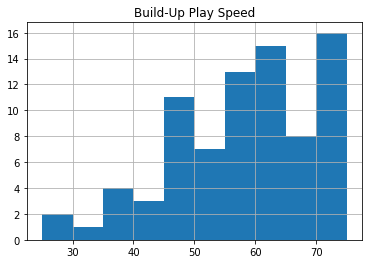

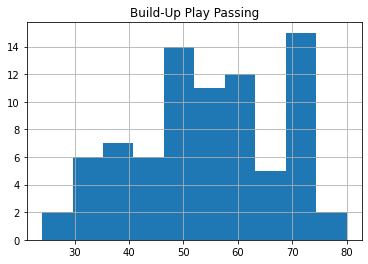

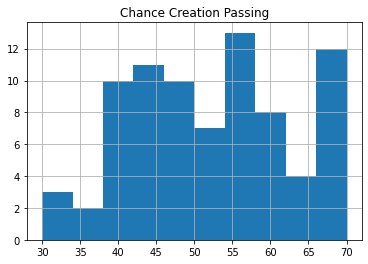

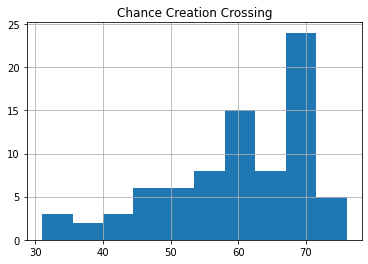

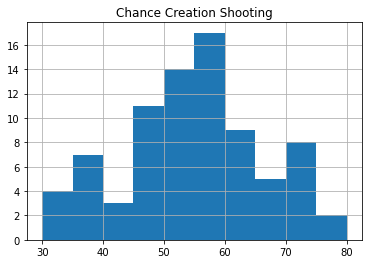

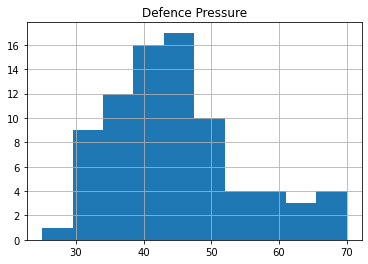

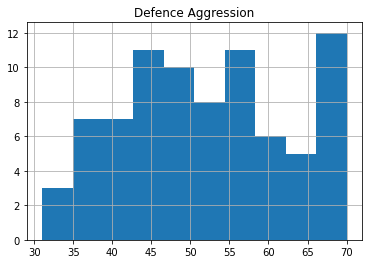

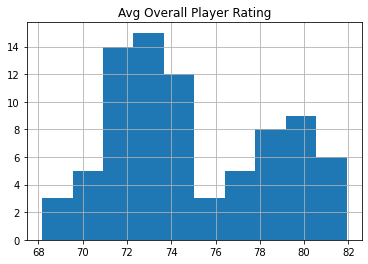

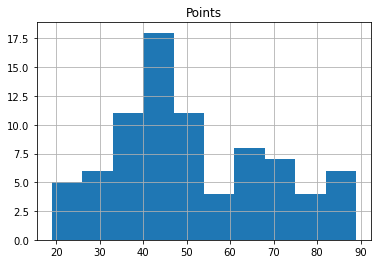

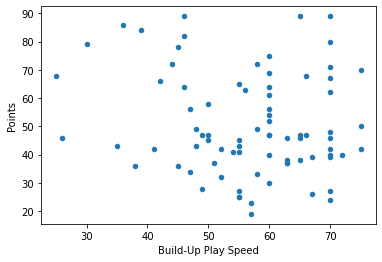

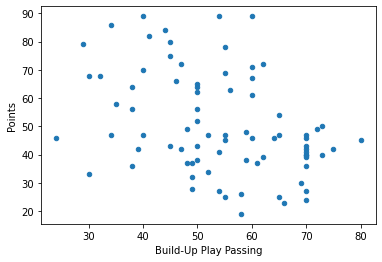

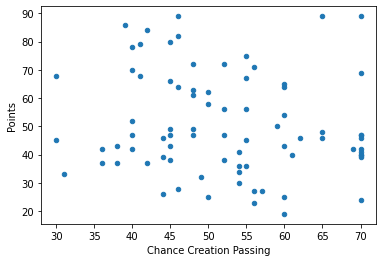

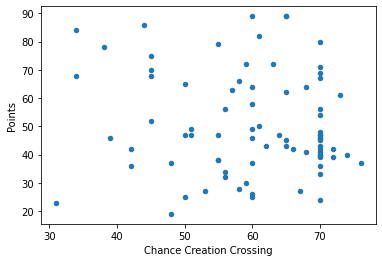

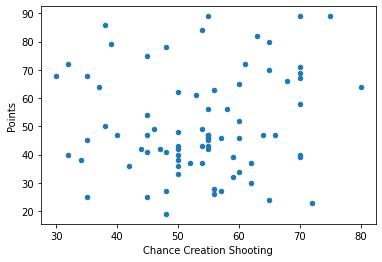

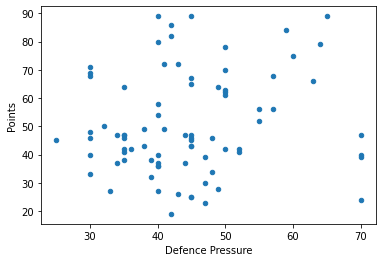

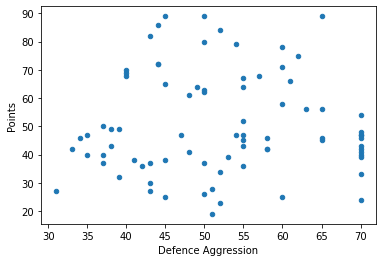

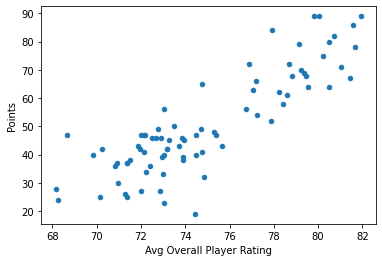

In [78]:
# print(df5.iloc[:40]) # prints data for first 2 seasons in data set to verify accuracy of contents of dataframe df5
print(df5.size)
# print (df5.describe())
print(df5.columns)
# print histograms for all 7 continuous parameters/IVs and 1 DV 
for col in df5.columns:
    if(col!='Team API ID'):
        df5.hist(column = col)
# print scatterplots for all 7 continuous parameters/IVs and 1 DV
for col in df5.columns:
    if(col!='Team API ID' and col!='Points'):
        df5.plot.scatter(x=col, y='Points')

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

# construct list of parameters/IVs from which polynomial feature set will be constructed
IVs = ['Chance Creation Passing', 'Chance Creation Crossing', 'Defence Pressure', 'Defence Aggression', 'Avg Overall Player Rating']
# create train / test split using dataframe
x_train, x_test, y_train, y_test = train_test_split(df5.loc[:, IVs], df5.loc[:, 'Points'], test_size=0.15, random_state=13)
# make sure results make sense
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)
# construct Pipeline object using PolynomialFeatures and Linear Regression as estimators
poly_model = make_pipeline(PolynomialFeatures(2),LinearRegression(normalize=True))
# estimate linear model with polynomial features
poly_1 = poly_model.fit(x_train, y_train)
# predict values for test sets
poly_1_predict = poly_1.predict(x_test)
# find RMSE; y_true first then y_model
print ("linear train / test rmse: ", mean_squared_error(y_train, poly_1.predict(x_train))**(.5), " / ", mean_squared_error(y_test, poly_1_predict)**(.5))
# also do R^2
print ("linear train / test r^2: ", r2_score(y_train, poly_1.predict(x_train)), " / ", r2_score(y_test, poly_1_predict))
# print intercept, ORDERED coefficients, and ORDERED polynomial features
print("Linear Regression intercept: ", poly_1['linearregression'].intercept_) 
print("Linear Regression coefficients: ", poly_1['linearregression'].coef_)
print("Feature Set: ")
print(PolynomialFeatures(2).fit(x_train, y_train).get_feature_names())
print("(where x0 = Chance Creation Passing, x1 = Chance Creation Crossing, x2 = Defence Pressure, x3 = Defence Aggression, x4 = Avg Overall Player Rating)")

(68, 5) (68,)
(12, 5) (12,)
linear train / test rmse:  7.885432019869887  /  5.413331921743959
linear train / test r^2:  0.8098614393029651  /  0.8810754615090046
Linear Regression intercept:  785.5169837092808
Linear Regression coefficients:  [ 0.00000000e+00  5.56852730e-01  1.40967246e+00 -4.81676882e+00
  5.85194317e+00 -2.61964655e+01  2.67966776e-03  9.54598446e-03
  5.17786646e-03  1.27234225e-03 -2.20040865e-02 -1.86821854e-02
 -4.63001215e-02  2.20633846e-02  1.69501356e-02  1.77058517e-05
  2.35267473e-02  8.24387118e-02 -2.10400119e-02 -8.22265840e-02
  2.04833214e-01]
Feature Set: 
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x2^2', 'x2 x3', 'x2 x4', 'x3^2', 'x3 x4', 'x4^2']
(where x0 = Chance Creation Passing, x1 = Chance Creation Crossing, x2 = Defence Pressure, x3 = Defence Aggression, x4 = Avg Overall Player Rating)
